# Day 48 Advanced Data Cleaning in Pandas

# 🧩 Step 1: Load Dataset & Inspect

In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("penguins")
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# 🧹 Step 2: Handle Missing Data 

# 1️⃣ Drop Missing Values

In [3]:
df1 = df.dropna()
df1.shape

(333, 7)

# 2️⃣ Forward Fill (use previous value)

In [4]:
df2 = df.ffill()
df2.shape

(344, 7)

# 3️⃣ Backward Fill (use next value)

In [5]:
df3 = df.bfill()
df3.shape

(344, 7)

# 4️⃣ Fill NaN with Custom Values

In [6]:
df['sex'] = df['sex'].fillna('unkown')

In [7]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

# 🧩 Step 3: Handle Duplicates

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# 🧩 Step 4: Handle Outliers (Basic)

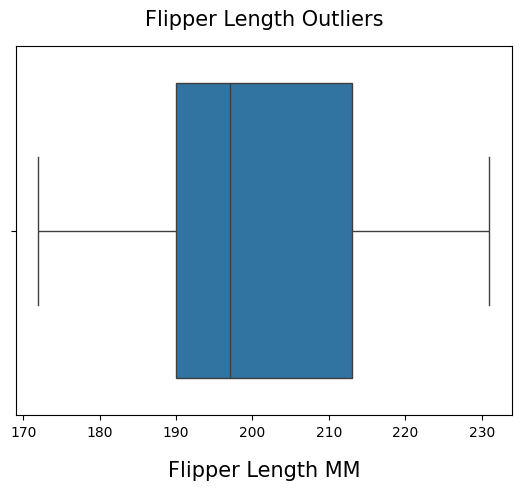

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['flipper_length_mm'])
plt.title("Flipper Length Outliers", size=15, pad=15)
plt.xlabel("Flipper Length MM", size=15, labelpad=15)
plt.show()

# Remove extreme values
q1 = df['flipper_length_mm'].quantile(0.25)
q3 = df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df['flipper_length_mm'] >= lower)
        & (df['flipper_length_mm'] <= upper)]

# 📈 Step 5: Check Cleaned Data Summary

In [10]:
print(df.isnull().sum())
print(df.shape)
print(df.describe())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
(342, 7)
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [11]:
'''🧠 Practice Tasks

Load any dataset (Penguins / Tips / Iris).

Show count of missing values per column.

Replace missing numeric values with mean, categorical with “Unknown”.

Find duplicates and remove them.

Plot a boxplot before and after outlier removal.

Save cleaned dataset as clean_penguins.csv.'''

'🧠 Practice Tasks\n\nLoad any dataset (Penguins / Tips / Iris).\n\nShow count of missing values per column.\n\nReplace missing numeric values with mean, categorical with “Unknown”.\n\nFind duplicates and remove them.\n\nPlot a boxplot before and after outlier removal.\n\nSave cleaned dataset as clean_penguins.csv.'

In [12]:
import seaborn as sns
import pandas as pd

dfp = sns.load_dataset('titanic')
dfp.info()
dfp.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# Replace missing numeric values with mean, categorical with “Unknown”.
dfp['age'] = dfp['age'].fillna(dfp['age'].mean())
dfp['age'] = dfp['age'].astype(int)
dfp.head()

dfp['embark_town'] = dfp['embark_town'].ffill()
dfp['embarked'] = dfp['embarked'].bfill()

In [14]:
# Find duplicates and remove them.
dfp.duplicated().sum()
dfp.drop_duplicates(inplace=True)
dfp.duplicated().sum()

np.int64(0)

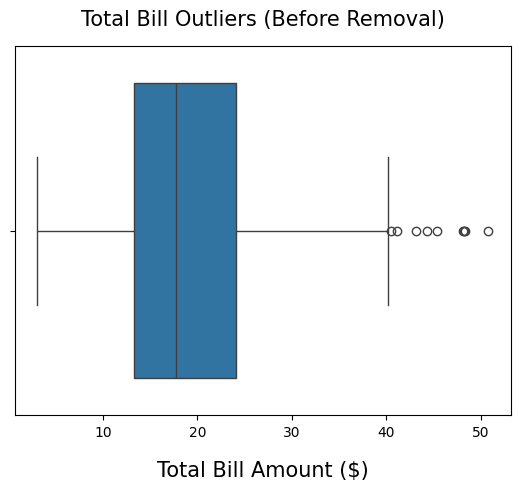

244


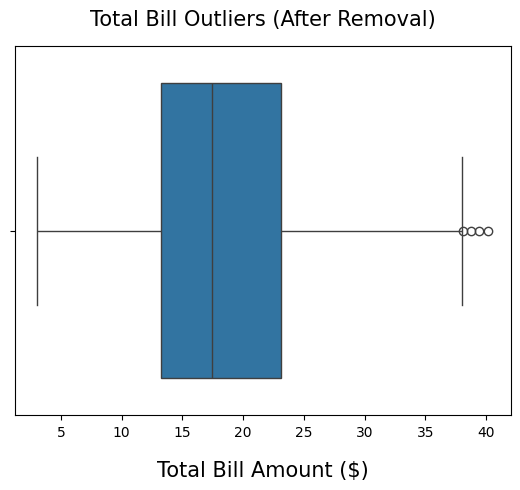

235

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in 'tips' dataset
df_tips = sns.load_dataset("tips")

# 1. Plot the original data (Total Bill)
# You should see clear dots (outliers) above the top whisker
sns.boxplot(x=df_tips['total_bill'])
plt.title("Total Bill Outliers (Before Removal)", size=15, pad=15)
plt.xlabel("Total Bill Amount ($)", size=15, labelpad=15)
plt.show()
print(len(df_tips))

# --- Outlier Removal using IQR ---
q1 = df_tips['total_bill'].quantile(0.25)
q3 = df_tips['total_bill'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filter the DataFrame to remove the outliers
df_cleaned = df_tips[(df_tips['total_bill'] >= lower) & (df_tips['total_bill'] <= upper)]

# 2. Plot the cleaned data
# The outliers (dots) should now be gone
sns.boxplot(x=df_cleaned['total_bill'])
plt.title("Total Bill Outliers (After Removal)", size=15, pad=15)
plt.xlabel("Total Bill Amount ($)", size=15, labelpad=15)
plt.show()
len(df_cleaned)

# Day 49 Detecting Outliers

In [16]:
import pandas as pd
import numpy as np

# Example Data
data = {'age': [22, 25, 29, 24, 120, 23, 26, 28, 27, 30]}
dfq = pd.DataFrame(data)

q1 = dfq['age'].quantile(0.25)
q3 = dfq['age'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

dfq = dfq[(dfq['age'] < lower ) | (dfq['age'] > upper)]
dfq

,age
4,120


In [17]:
dfq['age'] = np.where(dfq['age'] > upper, upper, np.where(dfq['age'] < lower, lower, dfq['age']))
print(dfq)


    age
4  35.5


In [18]:
from scipy import stats

z = np.abs(stats.zscore(dfq['age']))
dfq['Z_score'] = z

# Mark outliers where z > 3
outliers = dfq[dfq['Z_score'] > 3]
print(outliers)


Empty DataFrame
Columns: [age, Z_score]
Index: []


In [19]:
median_value = dfq['age'].median()
dfq['age'] = np.where(dfq['age'] > upper, median_value, np.where(dfq['age'] < lower, median_value, dfq['age']))
dfq['age']


4    35.5
Name: age, dtype: float64

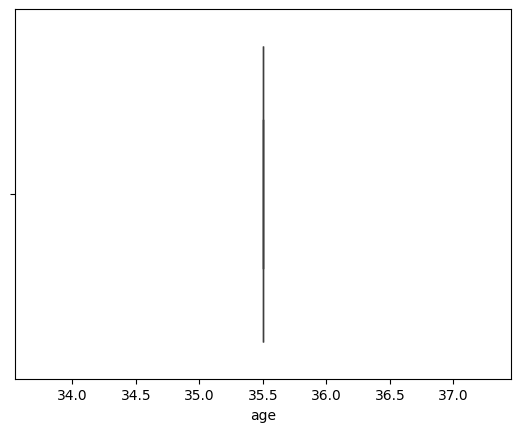

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dfq, x='age')
plt.show()


# 🔥 Day 54 – Data Visualization (Matplotlib Basics)

# 🧠 Step 1: Import and Basic Setup

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y = np.sin(x)

# Basic Line Plot

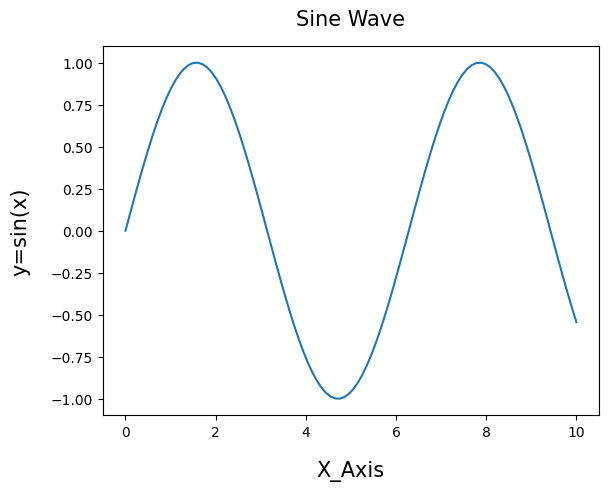

In [22]:
plt.plot(x,y)
plt.title("Sine Wave", size=15, pad=15)
plt.xlabel("X_Axis", size=15,labelpad=15)
plt.ylabel("y=sin(x)", size=15,labelpad=15)
plt.show()

# Bar Plot Using Matplotlib

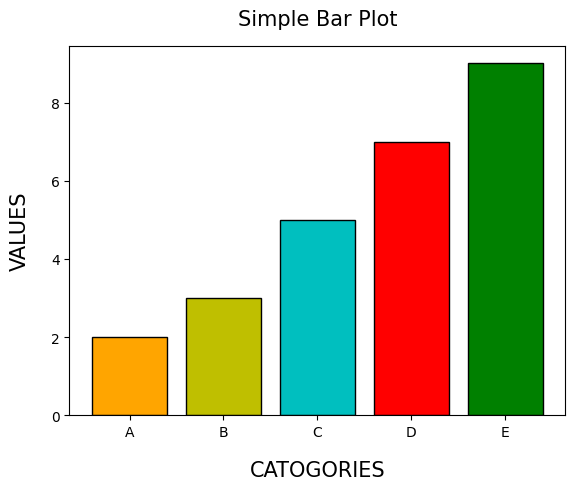

In [23]:
import matplotlib.pyplot as plt 
import numpy as np

categories = ['A', 'B', 'C', 'D',"E"]
values = [2,3,5,7,9]

plt.bar(categories, values, color=['orange','y','c','r','g'], edgecolor='k')
plt.title("Simple Bar Plot", size=15, pad=15)
plt.xlabel("CATOGORIES", size=15, labelpad=15)
plt.ylabel("VALUES", size=15, labelpad=15)
plt.show()

# ⚪ Step 4: Scatter Plot

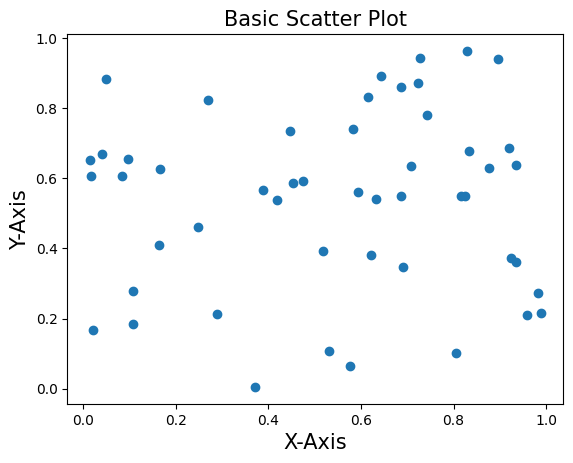

In [24]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x,y)
plt.title("Basic Scatter Plot", size=15)
plt.xlabel("X-Axis",size=15)
plt.ylabel("Y-Axis", size=15)
plt.show()

# 📊 Step 5: Histogram

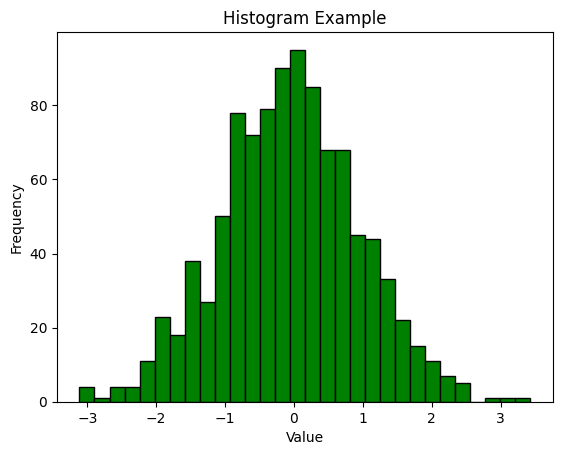

In [25]:
data = np.random.randn(1000)

plt.hist(data, bins=30, color='green', edgecolor='black')
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


# 🎨 Step 6: Customizing Plots

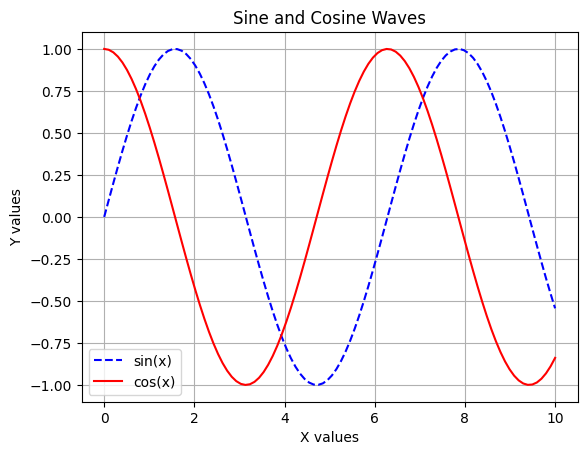

In [26]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), label="sin(x)", color='blue', linestyle='--')
plt.plot(x, np.cos(x), label="cos(x)", color='red')

plt.title("Sine and Cosine Waves")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()


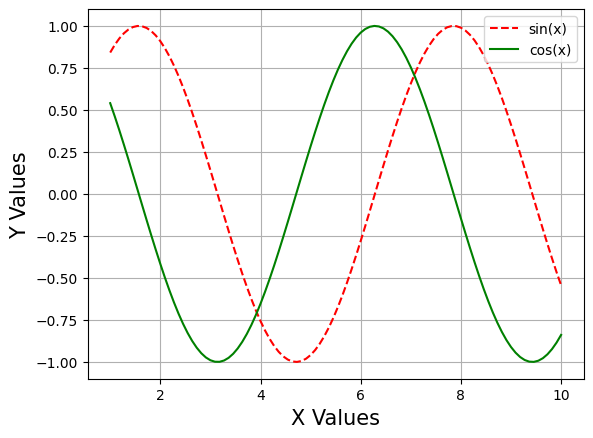

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10,100)

plt.plot(x, np.sin(x),label='sin(x)', color='r', linestyle='--')
plt.plot(x, np.cos(x), label='cos(x)', color='g')
plt.xlabel("X Values", size=15)
plt.ylabel("Y Values", size=15)
plt.legend()
plt.grid()
plt.show()

# 🔢 Step 7: Subplots (Multiple Graphs in One Figure)

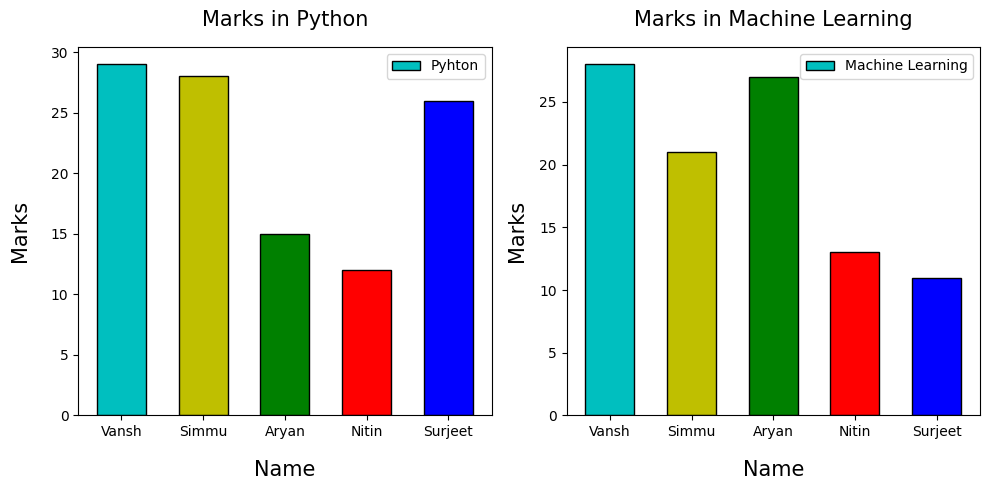

In [28]:
import matplotlib.pyplot as plt
import numpy as np

name = ['Vansh', 'Simmu', "Aryan", 'Nitin', 'Surjeet']
marks_py = [29,28,15,12,26]
marks_ml = [28,21,27,13,11]

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(name, marks_py, color=['c','y','g','r','b'], label='Pyhton', edgecolor='k', width=0.6)
plt.title('Marks in Python', size=15, pad=15)
plt.xlabel("Name", size=15, labelpad=15)
plt.ylabel("Marks", size=15, labelpad=15)
plt.legend()

plt.subplot(1,2,2)
plt.bar(name, marks_ml, color=['c','y','g','r','b'], label="Machine Learning", edgecolor='k',width=0.6)
plt.title('Marks in Machine Learning', size=15, pad=15)
plt.xlabel("Name", size=15, labelpad=15)
plt.ylabel("Marks", size=15, labelpad=9)

plt.legend()
plt.tight_layout()
plt.show()

# 🌸 Day 55 – Seaborn for Data Visualization (Beginner Level)

# 🧠 Step 1: Import Seaborn and Load a Dataset

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

df = sns.load_dataset('tips')
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

# 📊 Step 2: Scatter Plot (relplot / scatterplot)

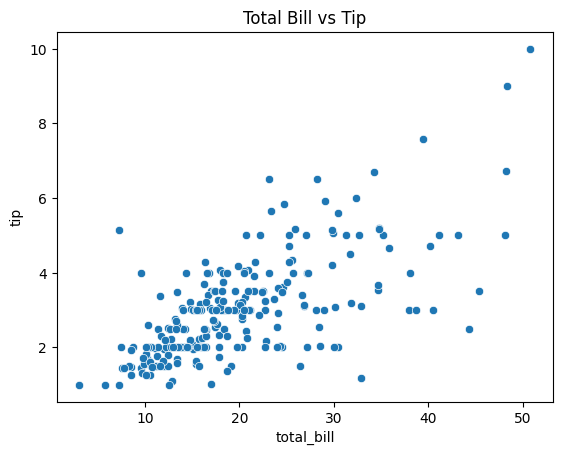

In [30]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs Tip")
plt.show()

# 📈 Step 3: Line Plot

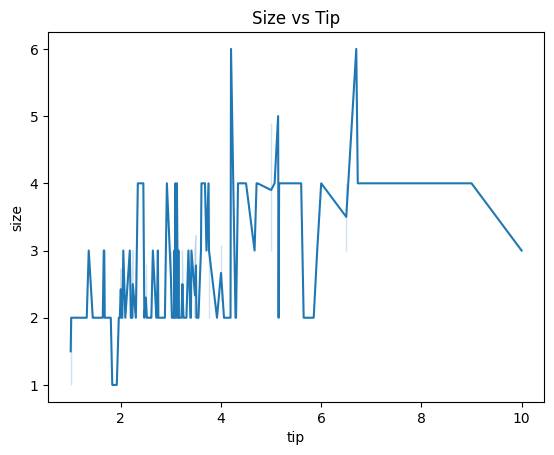

In [31]:
sns.lineplot(x= df['tip'],y= df['size'])
plt.title("Size vs Tip")
plt.show()

# 🍔 Step 4: Categorical Plot (Bar Plot)

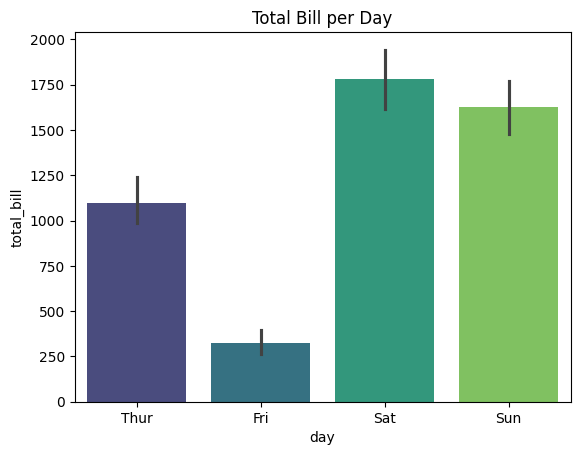

In [32]:
sns.barplot(x="day", y="total_bill", data=df,hue='day', estimator=sum, palette="viridis")
plt.title("Total Bill per Day")
plt.show()

# 🎨 Step 5: Count Plot

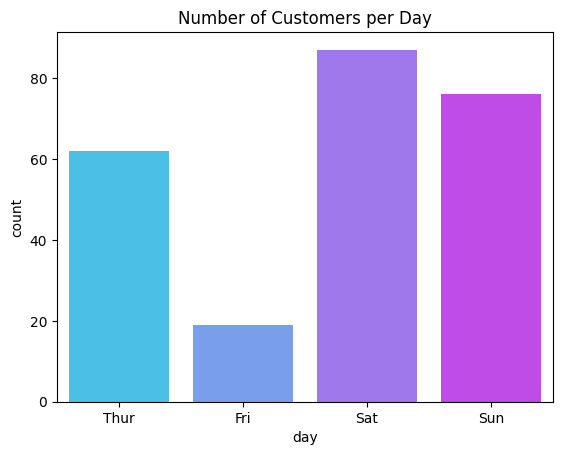

In [33]:
sns.countplot(x='day',hue='day', data=df, palette='cool')
plt.title("Number of Customers per Day")
plt.show()

# 🎯 Step 6: Histogram & KDE Plot

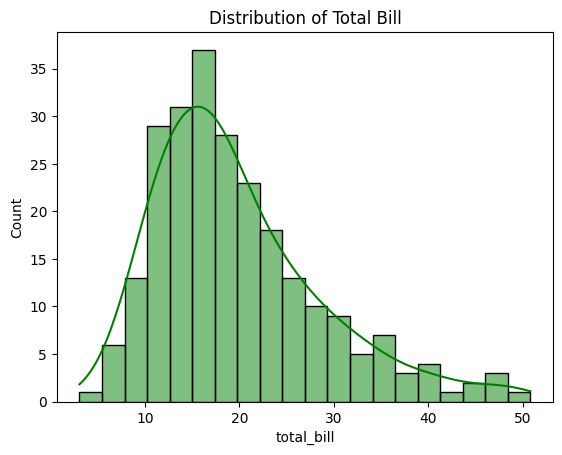

In [34]:
sns.histplot(x=df["total_bill"], bins=20, kde=True, color="green")
plt.title("Distribution of Total Bill")
plt.show()


# 💥 Step 7: Box Plot (Detect Outliers)

C:\Users\w\AppData\Local\Temp\ipykernel_7524\2780617615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=df, palette="Set2")


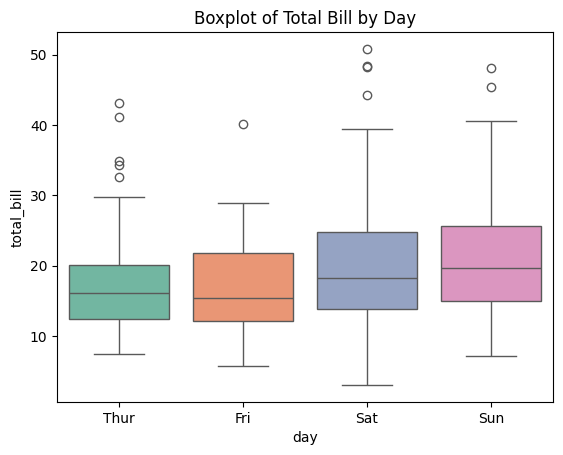

In [35]:
sns.boxplot(x="day", y="total_bill", data=df, palette="Set2")
plt.title("Boxplot of Total Bill by Day")
plt.show()

# 🧠 Step 10: Style & Theme

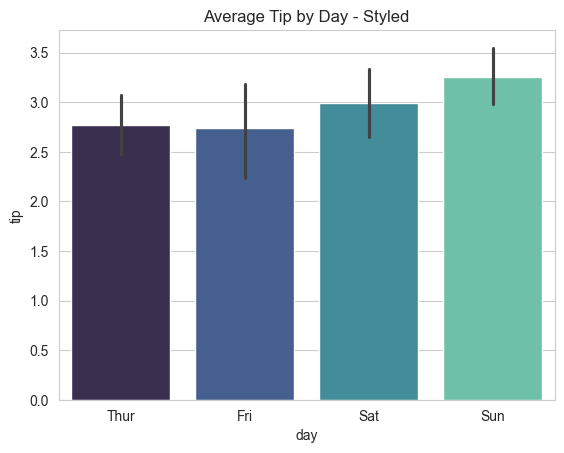

In [36]:
sns.set_style("whitegrid")  # other options: "dark", "ticks", "white", "darkgrid"
sns.barplot(x="day", y="tip",hue='day', data=df, palette="mako")
plt.title("Average Tip by Day - Styled")
plt.show()


# 🔥 Day 56 – Exploratory Data Analysis (EDA) using Seaborn + Pandas

# 📂 Step 1: Load the Dataset📂 

In [37]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(10)
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 🔍 Step 2: Check for Missing Values

In [38]:
print("Checking Missing Values:\n", iris.isnull().sum())

Checking Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# 📊 Step 3: Basic Data Overview

In [39]:
print("Shape", iris.shape)
print("Unique Shape", iris['species'].unique)

Shape (150, 5)
Unique Shape <bound method Series.unique of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>


# 🌼 Step 4: Pairwise Relationships

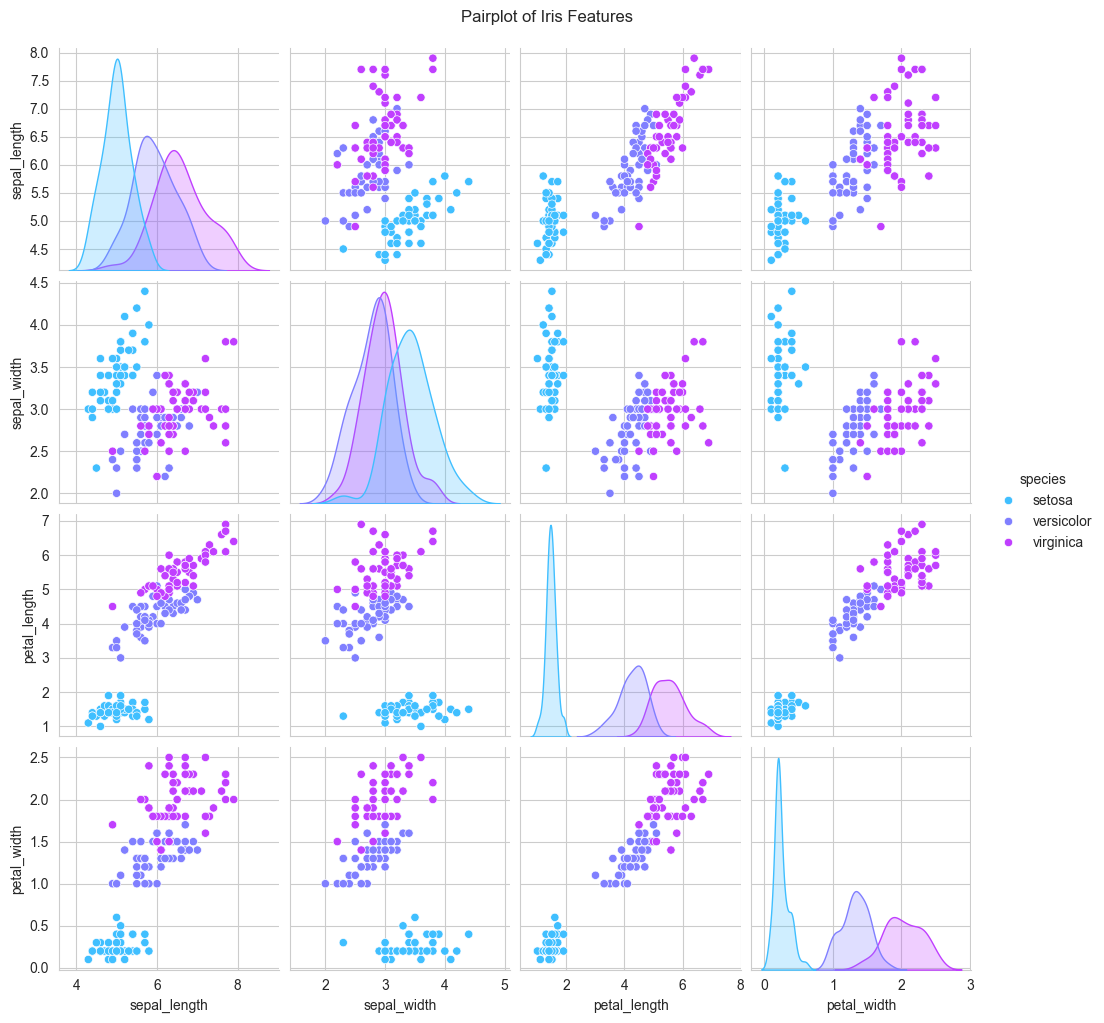

In [40]:
sns.pairplot(data=iris, hue='species', palette='cool')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# 📈 Step 5: Boxplot (Outlier Detection)

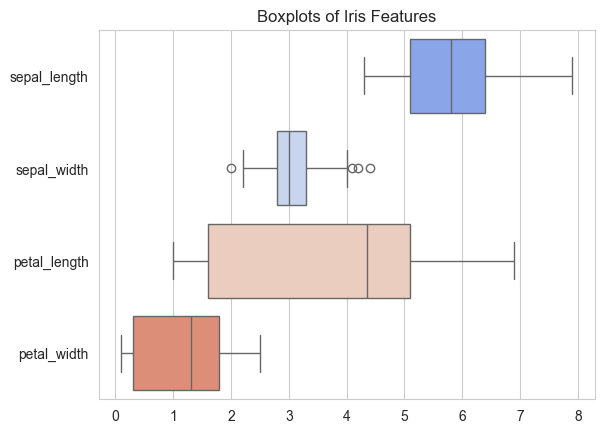

In [41]:
sns.boxplot(data=iris, orient='h', palette='coolwarm')
plt.title("Boxplots of Iris Features")
plt.show()

# 🌿 Step 6: Correlation Heatmap

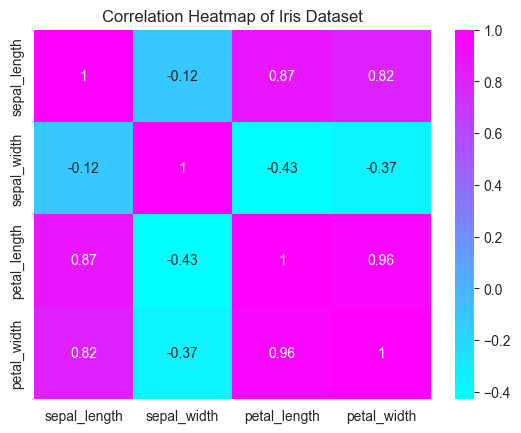

In [42]:
corr = iris.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='cool')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# 💠 Step 7: Category-Wise Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

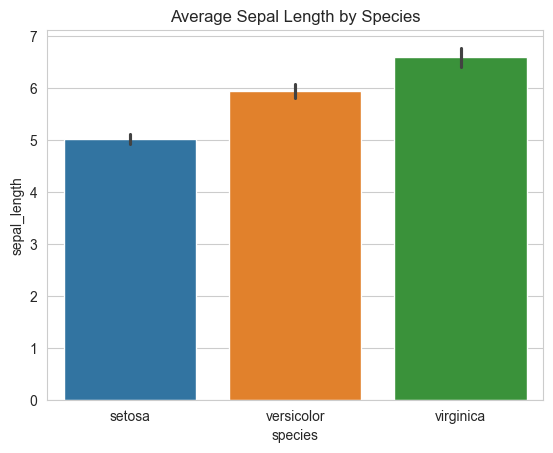

In [43]:
sns.barplot(x='species', y='sepal_length', data=iris, hue='species')
plt.title("Average Sepal Length by Species")
plt.show

# 2️⃣ Distribution by category

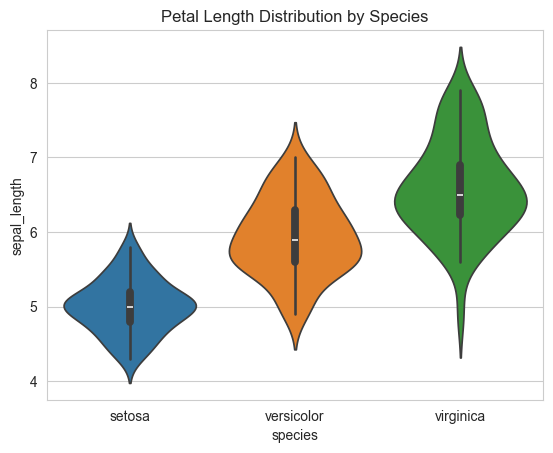

In [44]:
sns.violinplot(x='species', y='sepal_length', data=iris, hue='species')
plt.title("Petal Length Distribution by Species")
plt.show()

# 🧩 Step 8: Scatter Plot

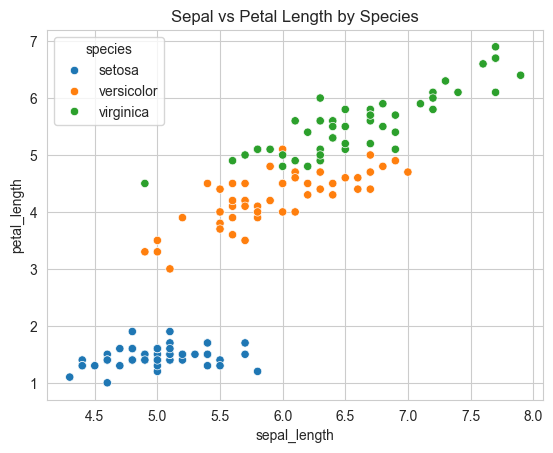

In [45]:
sns.scatterplot(x='sepal_length', y='petal_length', data=iris, hue='species')
plt.title("Sepal vs Petal Length by Species")
plt.show()

# 🧮 Step 9: Group and Summarize

In [46]:
summary = iris.groupby("species").mean(numeric_only=True)
print(summary)


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [47]:
#🎯 You can use .agg() too:

summary2 = iris.groupby("species").agg(['mean', 'std', 'max'])
print(summary2)

           sepal_length                sepal_width                 \
                   mean       std  max        mean       std  max   
species                                                             
setosa            5.006  0.352490  5.8       3.428  0.379064  4.4   
versicolor        5.936  0.516171  7.0       2.770  0.313798  3.4   
virginica         6.588  0.635880  7.9       2.974  0.322497  3.8   

           petal_length                petal_width                 
                   mean       std  max        mean       std  max  
species                                                            
setosa            1.462  0.173664  1.9       0.246  0.105386  0.6  
versicolor        4.260  0.469911  5.1       1.326  0.197753  1.8  
virginica         5.552  0.551895  6.9       2.026  0.274650  2.5  


# 🔥 Day 57 – Exploratory Data Analysis (EDA) Project – “Tips Dataset” 🍽️

# 📂 Step 1: Load the Dataset

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt 

tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 🔍 Step 2: Basic Overview

In [49]:
print("Original Data:", tips.shape)
print("Columns:",tips.columns)
print("Checking Missing Values:\n",tips.isnull().sum())
print("Unique Values:\n", tips.nunique())

Original Data: (244, 7)
Columns: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
Checking Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Unique Values:
 total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64


# 📊 Step 4: Univariate Analysis (Single Feature)

# 1️⃣ Distribution of total_bill

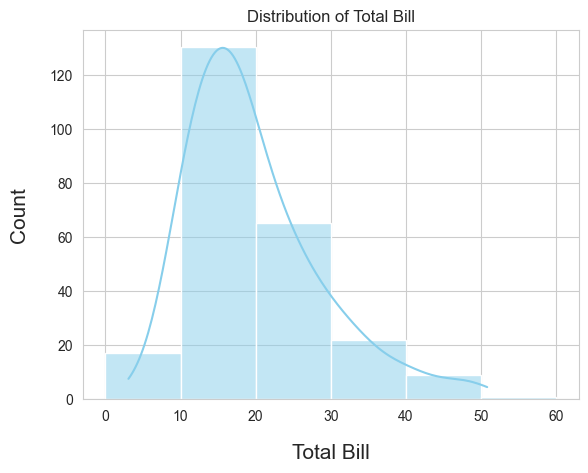

In [50]:
sns.histplot(tips['total_bill'], kde=True, color='skyblue',bins=[0,10,20,30,40,50,60])
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill", size=15, labelpad=15)
plt.ylabel("Count", size=15, labelpad=15)
plt.show()

# 2️⃣ Distribution of tip

C:\Users\w\AppData\Local\Temp\ipykernel_7524\1835759974.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(tips['tip'], kde=True, palette='cool')


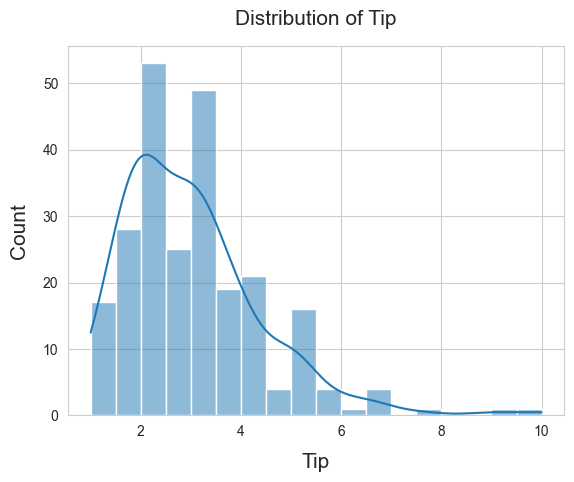

In [51]:
sns.histplot(tips['tip'], kde=True, palette='cool')
plt.title("Distribution of Tip", size=15, pad=15)
plt.xlabel("Tip", size=15, labelpad=10)
plt.ylabel("Count", size=15, labelpad=10)
plt.show()

# 3️⃣ Count of customers by day

C:\Users\w\AppData\Local\Temp\ipykernel_7524\2897328427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(tips['day'], palette='cool')


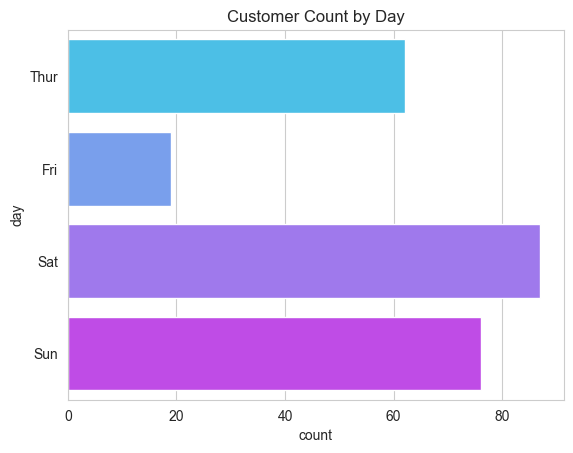

In [52]:
sns.countplot(tips['day'], palette='cool')
plt.title("Customer Count by Day")
plt.show()

# 🔗 Step 5: Bivariate Analysis (Relationships)

# 1️⃣ Bill vs Tip

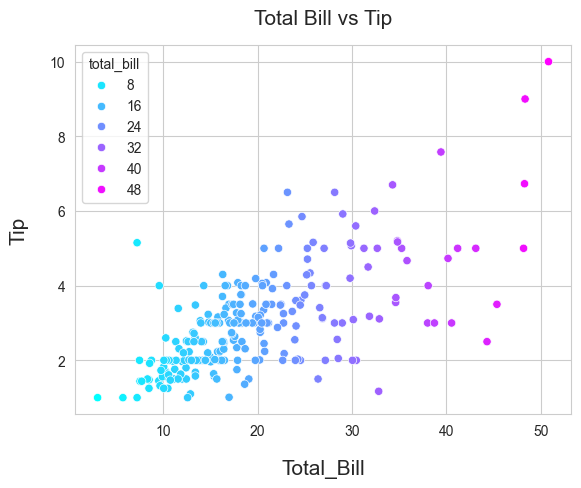

In [53]:
sns.scatterplot(x='total_bill', y='tip', data=tips, palette='cool', hue='total_bill')
plt.title("Total Bill vs Tip", size=15, pad=15)
plt.xlabel("Total_Bill", size=15, labelpad=15)
plt.ylabel("Tip", size=15, labelpad=15)
plt.show()

2️⃣ Bill vs Tip (by Gender)

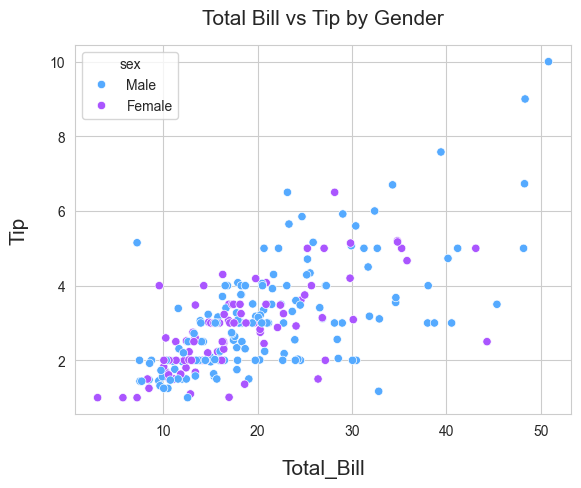

In [54]:
sns.scatterplot(x='total_bill', y='tip', data=tips, palette='cool', hue='sex')
plt.title("Total Bill vs Tip by Gender", size=15, pad=15)
plt.xlabel("Total_Bill", size=15, labelpad=15)
plt.ylabel("Tip", size=15, labelpad=15)
plt.show()

# 3️⃣ Average Tip by Day

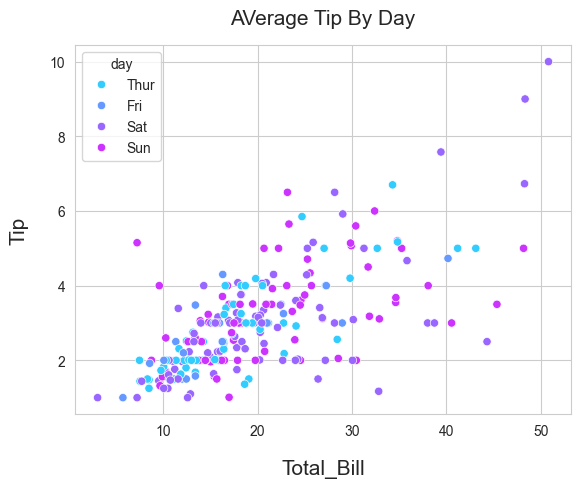

In [55]:
sns.scatterplot(x='total_bill', y='tip', data=tips, palette='cool', hue='day')
plt.title("AVerage Tip By Day", size=15, pad=15)
plt.xlabel("Total_Bill", size=15, labelpad=15)
plt.ylabel("Tip", size=15, labelpad=15)
plt.show()

# 🧮 Step 6: Correlation & Heatmap

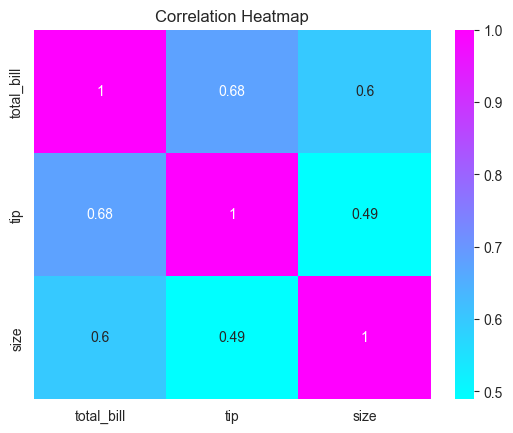

In [56]:
corr = tips.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='cool')
plt.title("Correlation Heatmap")
plt.show()

# 🌿 Step 7: Multivariate Visualization

# 1️⃣ Boxplot (Tip by Day & Gender)

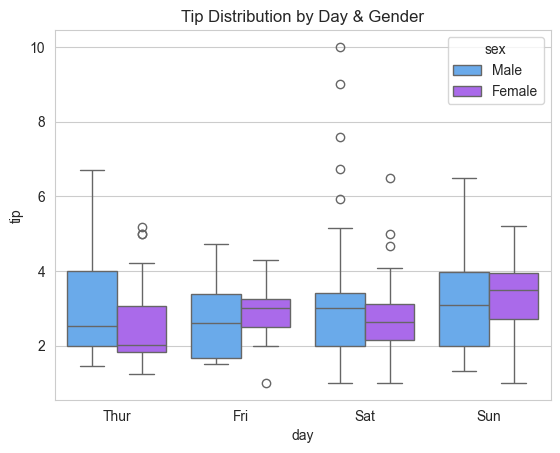

In [57]:
sns.boxplot(x='day', y='tip', hue='sex', data=tips, palette='cool')
plt.title("Tip Distribution by Day & Gender")
plt.show()

# 2️⃣ Violin Plot (Tip by Smoker)

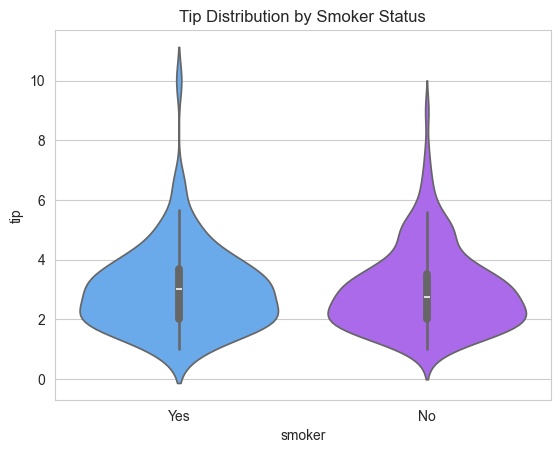

In [58]:
sns.violinplot(x='smoker', y='tip', data=tips,hue='smoker', palette="cool")
plt.title("Tip Distribution by Smoker Status")
plt.show()

# 🧠 Step 8: Group & Analyze

In [59]:
grouped = tips.groupby(['day', 'sex'])[['total_bill', 'tip']].mean().reset_index()
grouped

C:\Users\w\AppData\Local\Temp\ipykernel_7524\4281630794.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips.groupby(['day', 'sex'])[['total_bill', 'tip']].mean().reset_index()


,day,sex,total_bill,tip
0,Thur,Male,18.714667,2.980333
1,Thur,Female,16.715312,2.575625
2,Fri,Male,19.857000,2.693000
3,Fri,Female,14.145556,2.781111
4,Sat,Male,20.802542,3.083898
5,Sat,Female,19.680357,2.801786
6,Sun,Male,21.887241,3.220345
7,Sun,Female,19.872222,3.367222


# 📘 Step 9: Tip Percentage

   total_bill   tip  tip_percent
0       16.99  1.01     5.944673
1       10.34  1.66    16.054159
2       21.01  3.50    16.658734
3       23.68  3.31    13.978041
4       24.59  3.61    14.680765


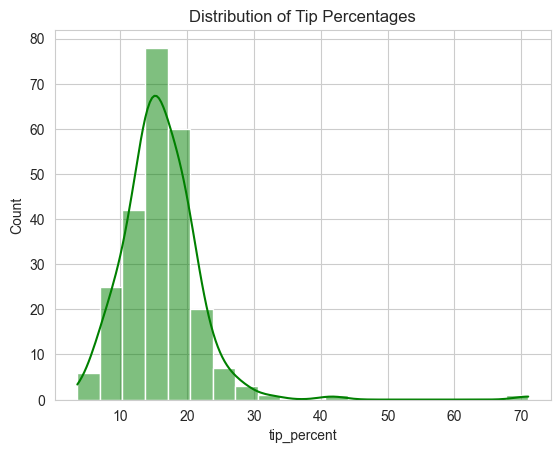

In [60]:
tips['tip_percent'] = tips['tip'] / tips['total_bill'] * 100
print(tips[['total_bill', 'tip', 'tip_percent']].head())

sns.histplot(tips['tip_percent'],  bins=20, color='green', kde=True)
plt.title("Distribution of Tip Percentages")
plt.show()
